Injamam Ul Karim, 18931984
Muhammad Imran, 12435579

Task 1

In [6]:
import pandas as pd
import numpy as np

data= pd.read_csv('sbdb.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394689 entries, 0 to 1394688
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   full_name  1394689 non-null  object 
 1   a          1392928 non-null  float64
 2   e          1394689 non-null  float64
 3   i          1394689 non-null  float64
 4   H          1389771 non-null  float64
 5   diameter   139699 non-null   float64
 6   albedo     138488 non-null   float64
 7   class      1394689 non-null  object 
 8   first_obs  1394689 non-null  object 
dtypes: float64(6), object(3)
memory usage: 95.8+ MB


In [7]:

data= (data[(data['a'] > 0)]).dropna()
data['first_obs'] = pd.to_datetime(data['first_obs'], errors='coerce')
data['class'] = data['class'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137917 entries, 0 to 1198582
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   full_name  137917 non-null  object        
 1   a          137917 non-null  float64       
 2   e          137917 non-null  float64       
 3   i          137917 non-null  float64       
 4   H          137917 non-null  float64       
 5   diameter   137917 non-null  float64       
 6   albedo     137917 non-null  float64       
 7   class      137917 non-null  category      
 8   first_obs  137917 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(6), object(1)
memory usage: 9.6+ MB


Task 2

In [8]:
filtered_data_a = data[(data['a'] >= 0.1) & (data['a'] <= 10**5)]

In [9]:
filtered_data_a.head()

,full_name,a,e,i,H,diameter,albedo,class,first_obs
0,1 Ceres (A801 AA),2.767,0.0792,10.59,3.34,939.400,0.0900,MBA,1995-01-05
1,2 Pallas (A802 FA),2.770,0.2304,34.92,4.12,513.000,0.1550,MBA,1804-08-27
2,3 Juno (A804 RA),2.670,0.2561,12.99,5.18,246.596,0.2140,MBA,1804-10-17
3,4 Vesta (A807 FA),2.361,0.0900,7.14,3.25,525.400,0.4228,MBA,1950-09-23
4,5 Astraea (A845 XA),2.576,0.1873,5.36,6.99,106.699,0.2740,MBA,1845-12-15


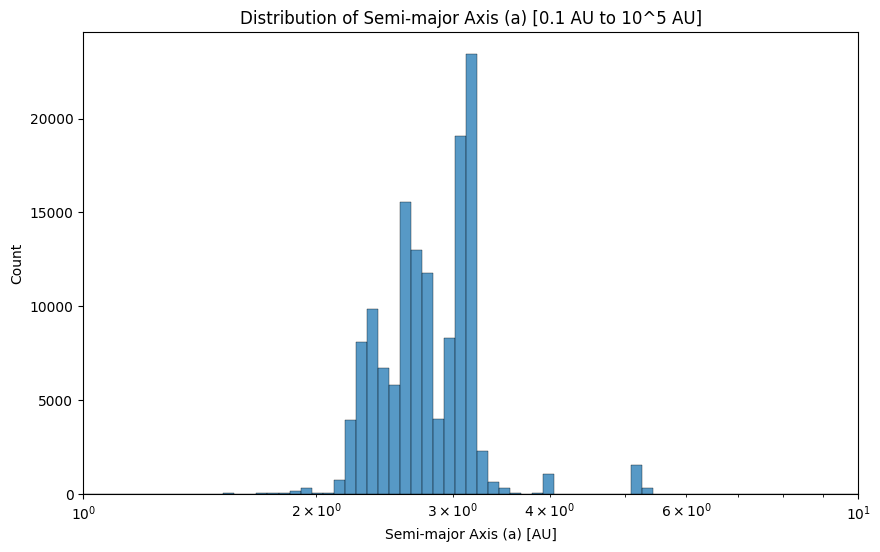

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_a['a'], bins=200, kde=False , log_scale=True)


plt.title('Distribution of Semi-major Axis (a) [0.1 AU to 10^5 AU]')
plt.xlabel('Semi-major Axis (a) [AU]')
plt.ylabel('Count')

#custom_base = 10  
#plt.xscale('log', base=custom_base)
plt.xlim(1, 10)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()


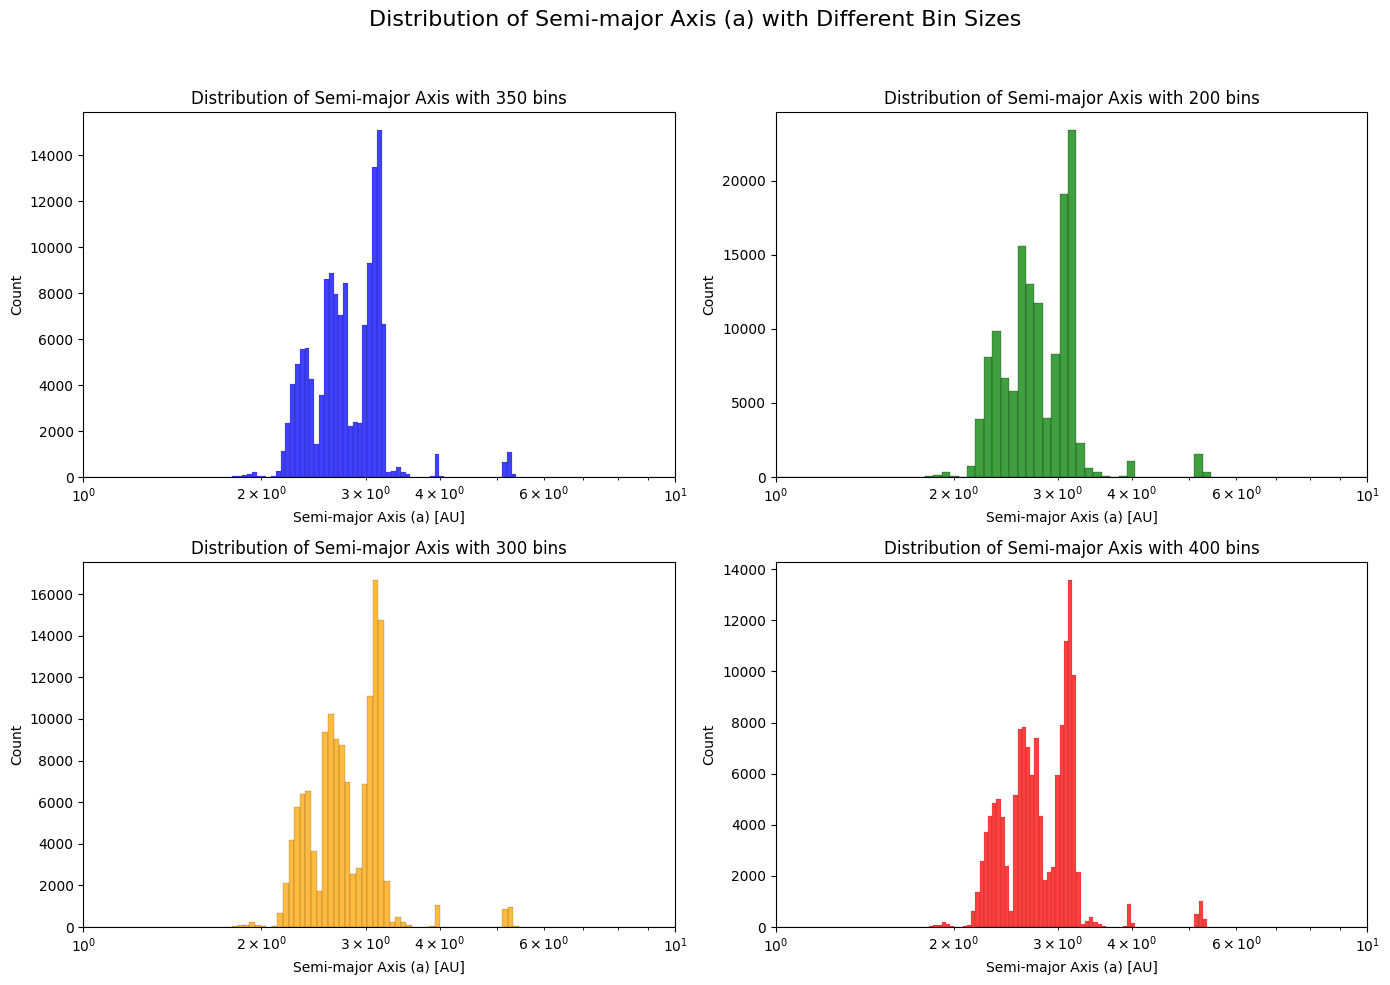

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your different bin sizes
bin_sizes = [350, 200, 300, 400]
colors = ['blue', 'green', 'orange', 'red']

# Create a figure and 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the bin sizes and axes to plot in each subplot
for i, (bin_size, color) in enumerate(zip(bin_sizes, colors)):
    sns.histplot(filtered_data_a['a'], bins=bin_size, kde=False, log_scale=True, color=color, ax=axes[i])
    axes[i].set_title(f'Distribution of Semi-major Axis with {bin_size} bins')
    axes[i].set_xlabel('Semi-major Axis (a) [AU]')
    axes[i].set_ylabel('Count')
    axes[i].set_xlim(1, 10)
    axes[i].ticklabel_format(style='plain', axis='y')

# Add a main title to the figure
plt.suptitle('Distribution of Semi-major Axis (a) with Different Bin Sizes', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

# Show the plot
plt.show()


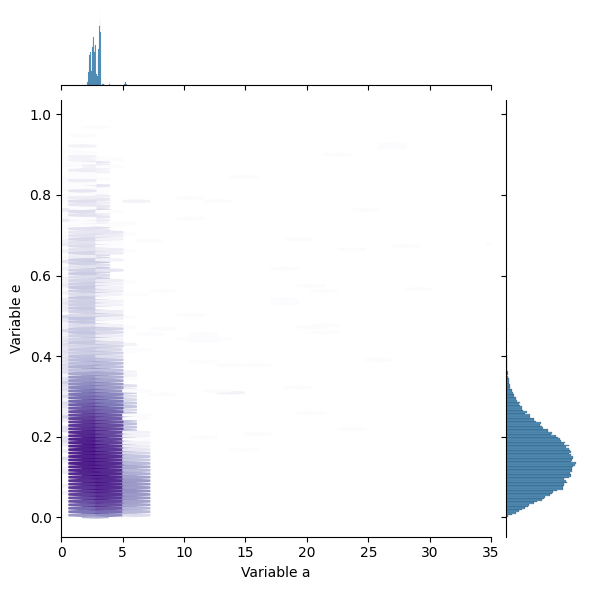

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


sns.jointplot(x=filtered_data_a['a'], y=filtered_data_a['e'], gridsize=100, cmap='Purples',kind='hex', bins='log', xlim=(0,35))
plt.xlabel('Variable a')
plt.ylabel('Variable e')
plt.show()


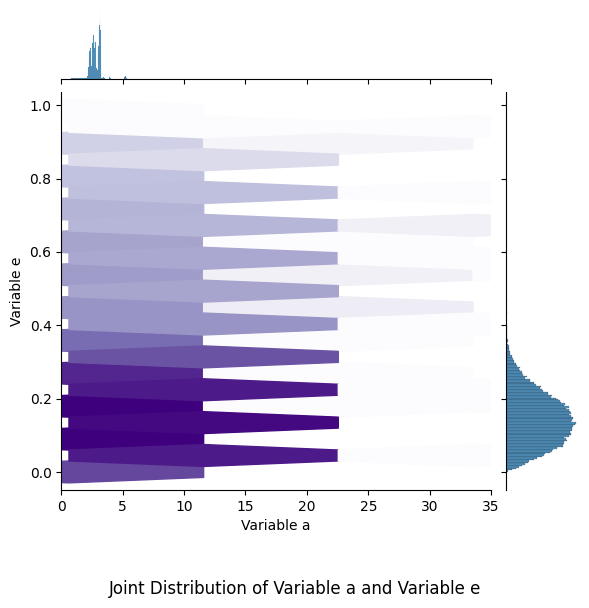

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.jointplot(
    x=filtered_data_a['a'], 
    y=filtered_data_a['e'], 
    kind='hex', 
    gridsize=20, 
    cmap='Purples', 
    bins='log',
    xlim=(0, 35)
)

g.set_axis_labels('Variable a', 'Variable e')


plt.subplots_adjust(top=0.9, bottom=0.1)  
g.fig.suptitle('Joint Distribution of Variable a and Variable e', y=-0.05)  

plt.show()


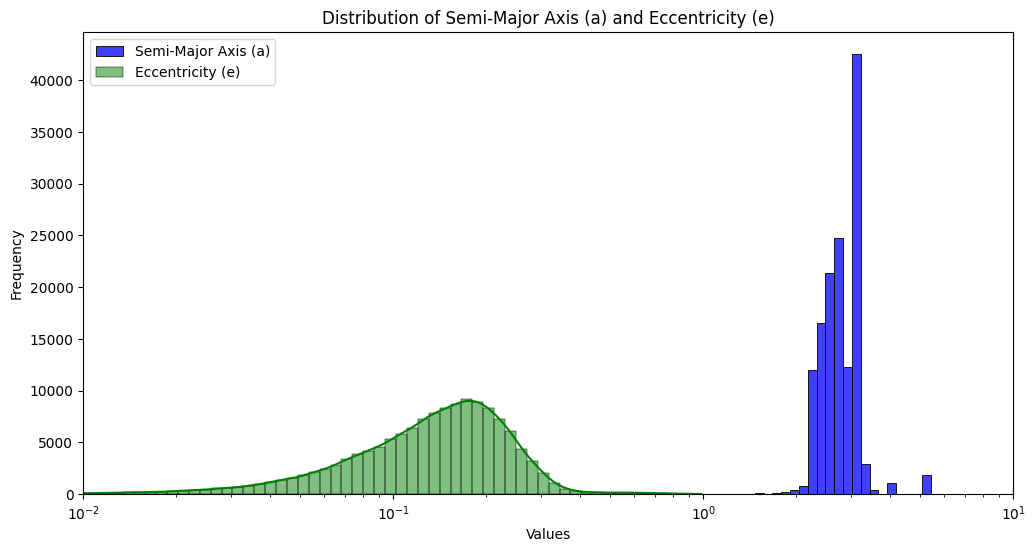

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot for column 'a'
sns.histplot(filtered_data_a['a'], bins=100, kde=False, color='blue', label='Semi-Major Axis (a)', log_scale=True)
# Plot for column 'e'
sns.histplot(filtered_data_a['e'], bins=100, kde=True, color='green', label='Eccentricity (e)', log_scale=True)

plt.xscale('log')  # Log scale on x-axis for better visualization of wide range
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Semi-Major Axis (a) and Eccentricity (e)')
plt.xlim(0.01, 10)
plt.legend()
plt.show()

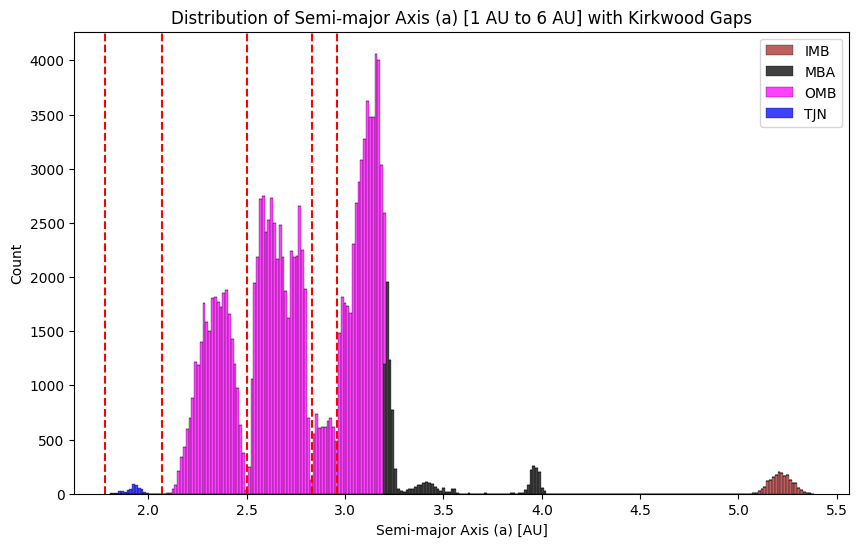

In [15]:
custom_palette = ['red', 'green', 'cyan', 'orange', 'purple', 'blue','magenta', 'yellow', 'black', 'brown', 'pink']

plt.figure(figsize=(10, 6))
filtered_data = data[(data['a'] >= 1) & (data['a'] <= 6) & (data['class'].isin(['IMB', 'MBA', 'OMB', 'TJN']))]
sns.histplot(filtered_data, x='a', hue='class', multiple='stack', bins=250,palette=custom_palette)

plt.title('Distribution of Semi-major Axis (a) [1 AU to 6 AU] with Kirkwood Gaps')
plt.xlabel('Semi-major Axis (a) [AU]')
plt.ylabel('Count')
plt.legend(loc='upper right',labels=['IMB', 'MBA', 'OMB', 'TJN'])

resonances = [1.78, 2.07, 2.50, 2.83, 2.96]
resonance_labels = ['3:1', '5:2', '2:1', '7:3', '5:3']
for r in resonances:
    plt.axvline(x=r, color='red', linestyle='--')

plt.show()

Task 4

In [16]:

filtered_data_daH = data[['diameter', 'albedo', 'H']]
filtered_data_daH = filtered_data_daH.dropna()
filtered_data_daH.head()


,diameter,albedo,H
0,939.400,0.0900,3.34
1,513.000,0.1550,4.12
2,246.596,0.2140,5.18
3,525.400,0.4228,3.25
4,106.699,0.2740,6.99


In [17]:

nan_albedo = filtered_data_daH['albedo'].isna().sum()
nan_diameter = filtered_data_daH['diameter'].isna().sum()
nan_H = filtered_data_daH['H'].isna().sum()

print(f"Number of NaN values in 'albedo': {nan_albedo}")
print(f"Number of NaN values in 'diameter': {nan_diameter}")
print(f"Number of NaN values in 'H': {nan_H}")

Number of NaN values in 'albedo': 0
Number of NaN values in 'diameter': 0
Number of NaN values in 'H': 0


Task 5

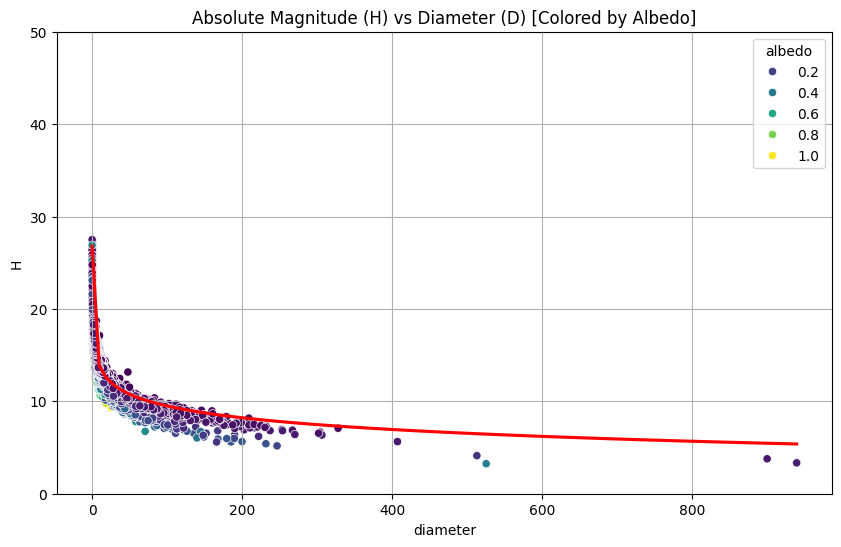

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter1 = sns.scatterplot(x='diameter', y='H', hue='albedo', data=filtered_data_daH, palette='viridis')
plt.ylim(0, 50)
plt.xlabel('Diameter (D) [km]')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude (H) vs Diameter (D) [Colored by Albedo]')
plt.grid(True)


sns.regplot(x='diameter', y='H', data=filtered_data_daH,
            scatter=False, color='red', logx=True)

plt.show()

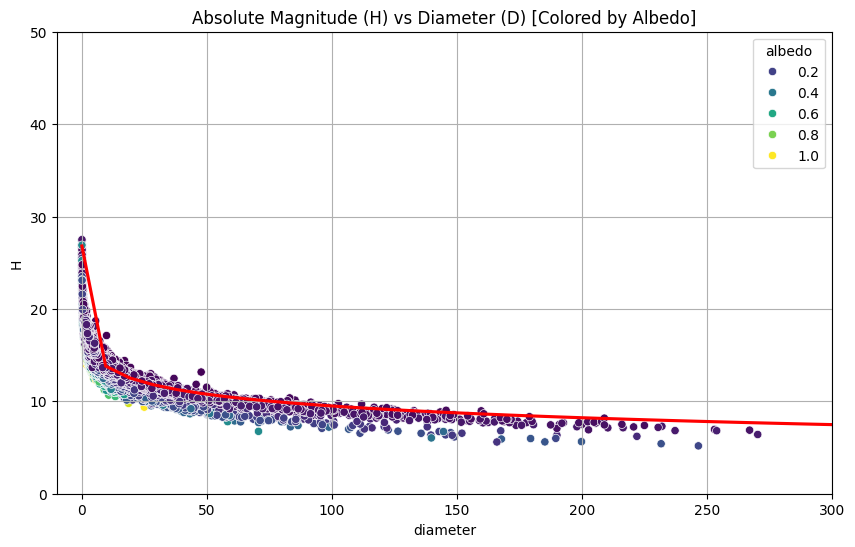

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter1 = sns.scatterplot(x='diameter', y='H', hue='albedo', data=filtered_data_daH, palette='viridis')
plt.xlim(-10, 300) 
plt.ylim(0, 50)
plt.xlabel('Diameter (D) [km]')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude (H) vs Diameter (D) [Colored by Albedo]')
plt.grid(True)


sns.regplot(x='diameter', y='H', data=filtered_data_daH,
            scatter=False, color='red', logx=True)

plt.show()

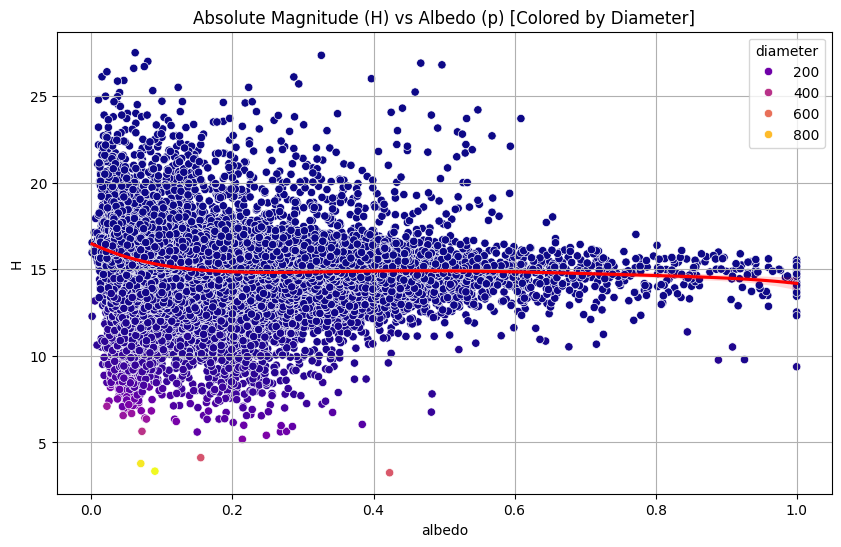

In [20]:
# Chart 2: H vs Albedo (grouped by different diameter ranges)
plt.figure(figsize=(10, 6))
scatter2 = sns.scatterplot(x='albedo', y='H', hue='diameter', data=filtered_data_daH, palette='plasma')
#plt.xscale('log')  # Logarithmic scale for albedo
plt.xlabel('Albedo (p)')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude (H) vs Albedo (p) [Colored by Diameter]')
plt.grid(True)

sns.regplot(x='albedo', y='H', data=filtered_data_daH, scatter=False, color='red', logx=False,order = 5)
plt.show()

/var/folders/t8/58pvkh952p3c230j1hyfwh9c0000gn/T/ipykernel_997/1489043047.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_H_per_albedo = filtered_data_daH.groupby('albedo_bin')['H'].mean().reset_index()
/var/folders/t8/58pvkh952p3c230j1hyfwh9c0000gn/T/ipykernel_997/1489043047.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  albedo_bin_midpoints = filtered_data_daH.groupby('albedo_bin')['albedo'].mean().values  # Midpoint of each albedo bin


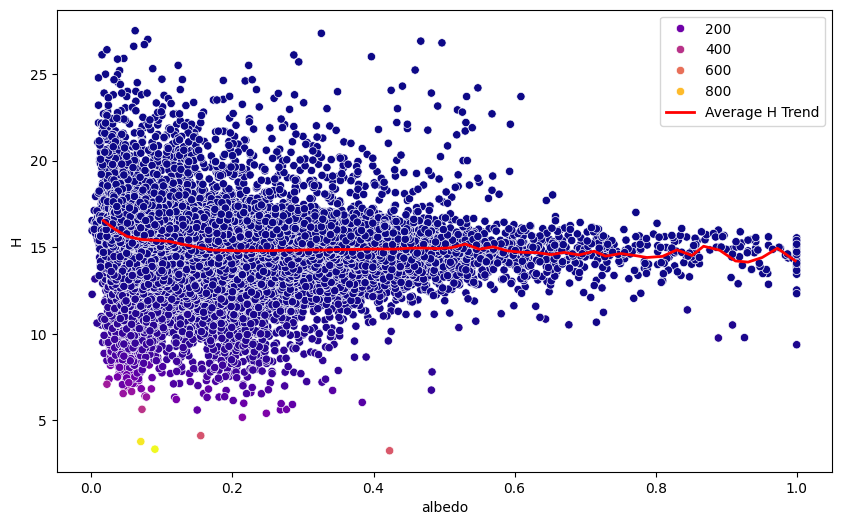

In [21]:
# Chart 2: H vs Albedo (grouped by different diameter ranges)
plt.figure(figsize=(10, 6))
scatter2 = sns.scatterplot(x='albedo', y='H', hue='diameter', data=filtered_data_daH, palette='plasma')
filtered_data_daH['albedo_bin'] = pd.cut(filtered_data_daH['albedo'], bins=50)
average_H_per_albedo = filtered_data_daH.groupby('albedo_bin')['H'].mean().reset_index()
albedo_bin_midpoints = filtered_data_daH.groupby('albedo_bin')['albedo'].mean().values  # Midpoint of each albedo bin
plt.plot(albedo_bin_midpoints, average_H_per_albedo['H'], color='red', linestyle='-', linewidth=2, label='Average H Trend')

plt.legend()
plt.show()

Task 6

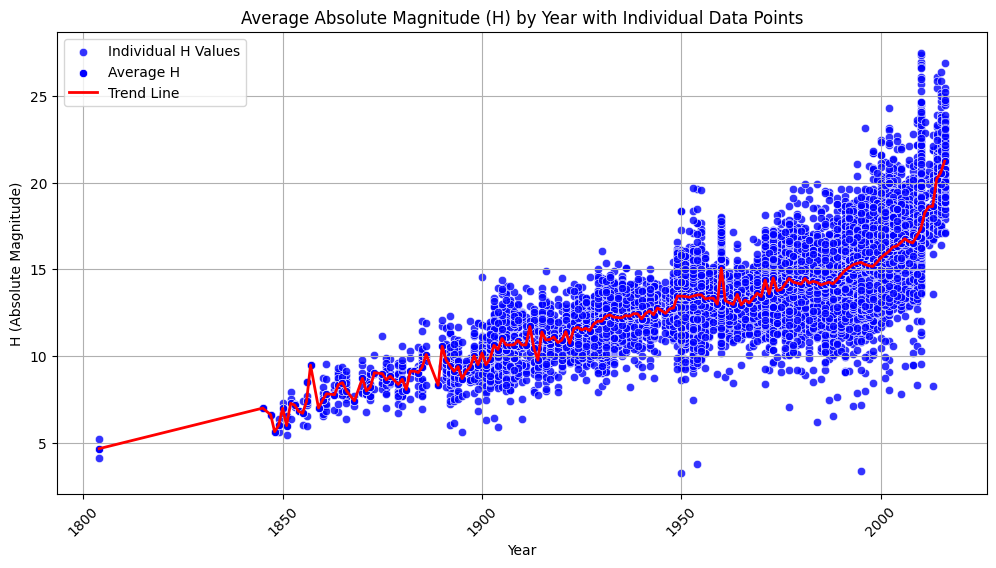

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['first_obs'] = pd.to_datetime(data['first_obs'], errors='coerce')
data['year'] = data['first_obs'].dt.year
average_H_per_year = data.groupby('year')['H'].mean().reset_index()
plt.figure(figsize=(12, 6))

sns.scatterplot(x='year', y='H', data=data, alpha=0.8, color='blue', label='Individual H Values')
sns.scatterplot(x='year', y='H', data=average_H_per_year, color='blue', label='Average H')
plt.plot(average_H_per_year['year'], average_H_per_year['H'], color='red', linestyle='-', linewidth=2, label='Trend Line')

plt.title('Average Absolute Magnitude (H) by Year with Individual Data Points')
plt.xlabel('Year')
plt.ylabel('H (Absolute Magnitude)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)

plt.show()



/var/folders/t8/58pvkh952p3c230j1hyfwh9c0000gn/T/ipykernel_997/1879629125.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_H_per_year_a = data.groupby(['year', 'a_bin'])['H'].mean().reset_index()


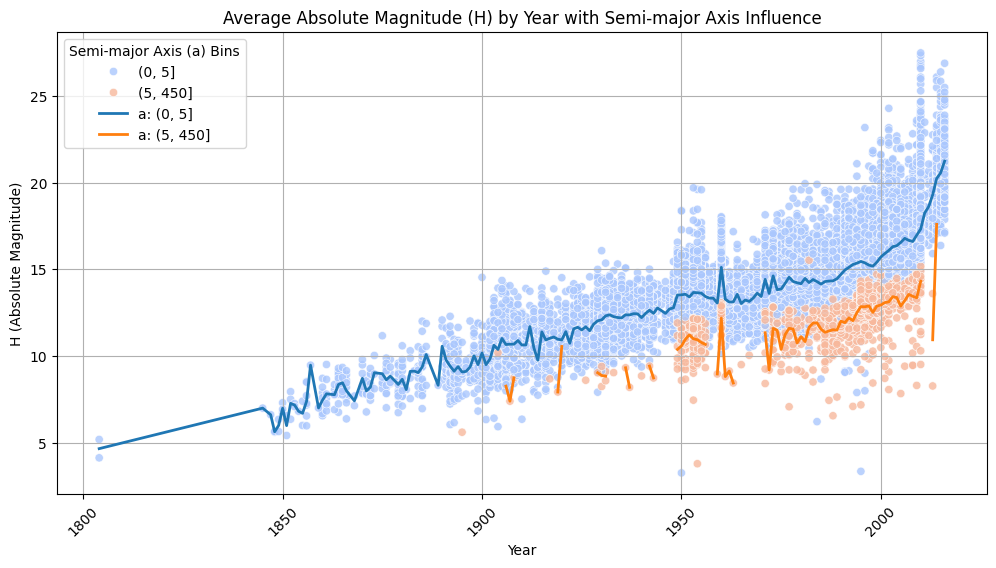

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data['first_obs'] = pd.to_datetime(data['first_obs'], errors='coerce')


data['year'] = data['first_obs'].dt.year


bins = [0,5, 450] 
data['a_bin'] = pd.cut(data['a'], bins)


average_H_per_year_a = data.groupby(['year', 'a_bin'])['H'].mean().reset_index()


plt.figure(figsize=(12, 6))

sns.scatterplot(x='year', y='H', hue='a_bin', data=data, palette='coolwarm', alpha=0.8)


for a_bin in average_H_per_year_a['a_bin'].unique():
    bin_data = average_H_per_year_a[average_H_per_year_a['a_bin'] == a_bin]
    plt.plot(bin_data['year'], bin_data['H'], label=f'a: {a_bin}', linewidth=2)


plt.title('Average Absolute Magnitude (H) by Year with Semi-major Axis Influence')
plt.xlabel('Year')
plt.ylabel('H (Absolute Magnitude)')
plt.xticks(rotation=45)  
plt.legend(title='Semi-major Axis (a) Bins')
plt.grid(True)


plt.show()


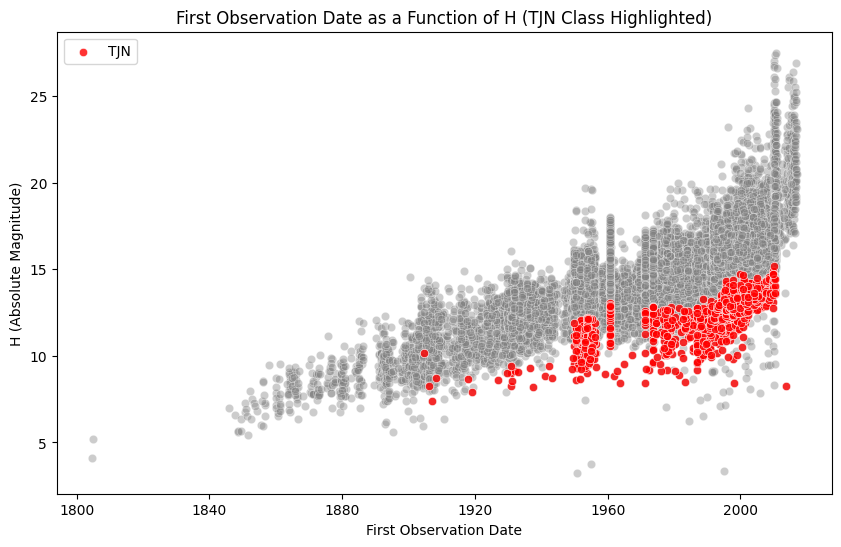

In [24]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['first_obs'],y= data['H'], color='grey', alpha=0.4)
tjn_data = data[data['class'] == 'TJN']
sns.scatterplot(x=tjn_data['first_obs'],y= tjn_data['H'], color='red', label='TJN', alpha=0.8)
plt.gca()
plt.title('First Observation Date as a Function of H (TJN Class Highlighted)')
plt.xlabel('First Observation Date')
plt.ylabel('H (Absolute Magnitude)')
plt.legend()
plt.show()

/var/folders/t8/58pvkh952p3c230j1hyfwh9c0000gn/T/ipykernel_997/3757354745.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_H_per_year_a = data.groupby(['year', 'a_bin'])['H'].mean().reset_index()


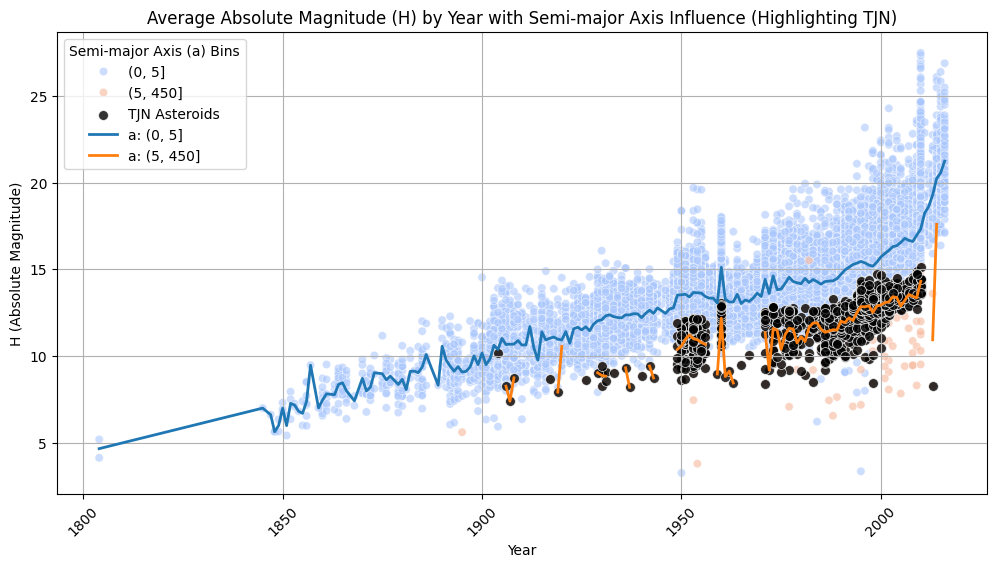

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


data['first_obs'] = pd.to_datetime(data['first_obs'], errors='coerce')


data['year'] = data['first_obs'].dt.year


bins = [0, 5, 450]  
data['a_bin'] = pd.cut(data['a'], bins)

average_H_per_year_a = data.groupby(['year', 'a_bin'])['H'].mean().reset_index()


plt.figure(figsize=(12, 6))
custom_palette = ['yellow','red', 'blue', 'orange']
sns.scatterplot(x='year', y='H', hue='a_bin', data=data, palette='coolwarm', alpha=0.6)


sns.scatterplot(x='year', y='H', data=tjn_data, color='black', marker='o', s=50, label='TJN Asteroids', alpha=0.8)


for a_bin in average_H_per_year_a['a_bin'].unique():
    bin_data = average_H_per_year_a[average_H_per_year_a['a_bin'] == a_bin]
    plt.plot(bin_data['year'], bin_data['H'], label=f'a: {a_bin}', linewidth=2)


plt.title('Average Absolute Magnitude (H) by Year with Semi-major Axis Influence (Highlighting TJN)')
plt.xlabel('Year')
plt.ylabel('H (Absolute Magnitude)')
plt.xticks(rotation=45)  
plt.legend(title='Semi-major Axis (a) Bins')
plt.grid(True)

plt.show()
